In [16]:
import sys, os
protomshome = os.environ["PROTOMSHOME"]
sys.path.append(protomshome +"/tools")
import calc_gci as cg

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline


In [171]:
from scipy import integrate
from scipy import special
from scipy import interpolate

def gci(B, N, kT=0.592):
    """
    Calculates the insertion free energy using grand canonical integration for and 
    input titration curve.

    Parameters
    ----------
    B : numpy array
      Adams values
    N : numpy array
      The average number of particles at a given B
    kT : float
      the thermal energy

    Returns
    -------
    F : float
      relative ideal gas transfer free energies
    """
    def nonintegral(N,B):
        return N*B - special.gammaln(N+1)
    
    def nonintegral_sterling(N,B):
        return N*B - N*(np.log(N)-1)
    
    titration = interpolate.interp1d(B, N, kind='cubic')
    
    #F = (nonintegral_sterling(N[-1],B[-1]) - nonintegral_sterling(N[0],B[0]) - integrate.quad(titration,a=B[0],b=B[-1])[0])
    F = (nonintegral(N[-1],B[-1]) - nonintegral(N[0],B[0]) - integrate.quad(titration,a=B[0],b=B[-1])[0])
    F = F*kT
    return F


def N_onesite(B, F,kT=0.592):
    return 1.0/(1 + np.exp(F/kT - B) 
               )
def N_twosite(B,F1,F2,kT=0.592):
    numerator = np.exp(B - F1/kT) + 2*np.exp(2*B - (F1 + F2)/kT)
    denominator = 1 + np.exp(B - F1/kT) + np.exp(2*B - (F1 + F2)/kT)
    return numerator/denominator

def N_threesite(B,F1,F2,F3,kT=0.592):
    numerator = np.exp(B - F1/kT) + 2*np.exp(2*B - (F1 + F2)/kT) + 3*np.exp(3*B - (F1 + F2 + F3)/kT) 
    denominator = 1 + np.exp(B - F1/kT) + np.exp(2*B - (F1 + F2)/kT) + np.exp(3*B - (F1 + F2 + F3)/kT) 
    return numerator/denominator

def N_foursite(B,F1,F2,F3,F4,kT=0.592):
    numerator = np.exp(B - F1/kT) + 2*np.exp(2*B - (F1 + F2)/kT) + 3*np.exp(3*B - (F1 + F2 + F3)/kT) + + 4*np.exp(4*B - (F1 + F2 + F3 + F4)/kT) 
    denominator = 1 + np.exp(B - F1/kT) + np.exp(2*B - (F1 + F2)/kT) + np.exp(3*B - (F1 + F2 + F3)/kT) + np.exp(4*B - (F1 + F2 + F3 + F4)/kT) 
    return numerator/denominator

## Single site

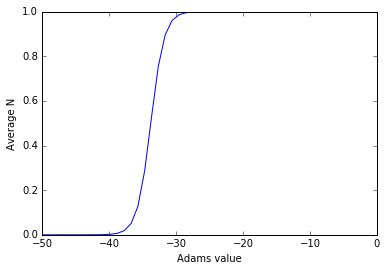

In [172]:
F = -20
B = np.linspace(-50,-0,50) 
N = N_onesite(B,F)

plt.plot(B,N)
plt.xlabel('Adams value')
plt.ylabel('Average N')
plt.show()

In [173]:
print 'Total analytical free energy = {0} kcal/mol'.format(F)
print 'Free energy estimated with GCI = {0} kcal/mol'.format(gci(B,N))

Total analytical free energy = -20 kcal/mol
Free energy estimated with GCI = -19.9999973112 kcal/mol


## Two sites

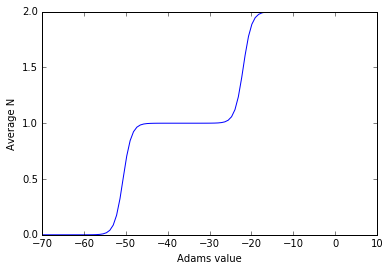

In [174]:
F1 = -30
F2 = -13
B = np.linspace(-70,10,100)
N = N_twosite(B,F1,F2)

plt.plot(B,N)
plt.xlabel('Adams value')
plt.ylabel('Average N')
plt.show()

In [175]:
print 'Total analytical free energy = {0} kcal/mol'.format(F1+F2)
print 'Free energy estimated with GCI = {0} kcal/mol'.format(gci(B,N))

Total analytical free energy = -43 kcal/mol
Free energy estimated with GCI = -43.4103429519 kcal/mol


## Three site

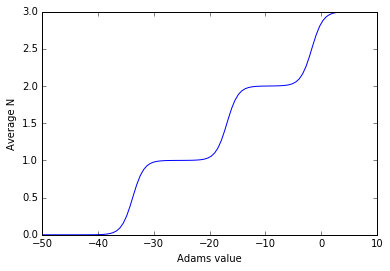

In [176]:
F1 = -20
F2 = -10
F3 = -1
B = np.linspace(-50,10,100)
N = N_threesite(B,F1,F2,F3)

plt.plot(B,N)
plt.xlabel('Adams value')
plt.ylabel('Average N')
plt.show()

In [177]:
print 'Total analytical free energy = {0} kcal/mol'.format(F1+F2+F3)
print 'Free energy estimated with GCI = {0} kcal/mol'.format(gci(B,N))

Total analytical free energy = -31 kcal/mol
Free energy estimated with GCI = -32.060767255 kcal/mol


## Four site

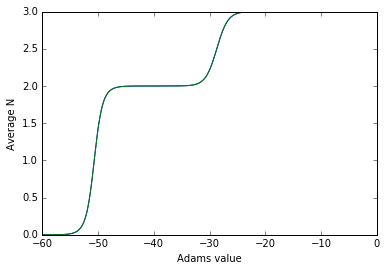

In [178]:
F1 = -30
F2 = -30
F3 = -17
F4 = -17
B = np.linspace(-60,0,1000)
N = N_threesite(B,F1,F2,F3)
N_pred = interpolate.interp1d(B, N, kind='cubic')
plt.plot(B,N)
plt.plot(B,N_pred(B))
plt.xlabel('Adams value')
plt.ylabel('Average N')
plt.show()

In [179]:
print 'Total analytical free energy = {0} kcal/mol'.format(F1+F2+F3+F4)
print 'Free energy estimated with GCI = {0} kcal/mol'.format(gci(B,N))

Total analytical free energy = -94 kcal/mol
Free energy estimated with GCI = -78.0575296335 kcal/mol


In [180]:
x = [0,0.41,]